In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from dateutil import parser

In [2]:
dataset = pd.read_csv('input/P39-CS3-Data/appdata10.csv')

In [3]:
### EDA (Exploratory Data Analysis) ###
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [6]:
dataset.describe() # String 형태의 Hour column이 표시되지 않는 문제 발생

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
dataset['hour'] = dataset.hour.str.slice(1, 3).astype(int)

In [26]:
# Plotting
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])

In [27]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


# Histograms

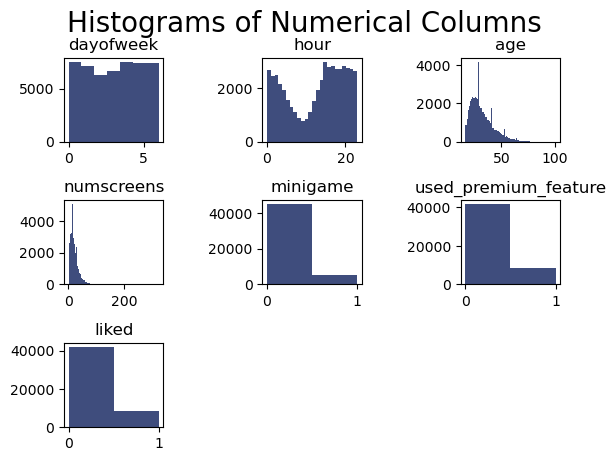

In [34]:
# matplot에서 figure 객체(틀), ax 객체(캔버스) 라고 생각하라
plt.suptitle('Histograms of Numerical Columns', fontsize =20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(3, 3, i) 
    f = plt.gca()        # Get current axes instance
    f.set_title(dataset2.columns.values[i - 1])
    
    vals = np.size(dataset2.iloc[:, i - 1].unique()) # 전체열 쿼리후 unique로 모든 고유값 가져옴
    plt.hist(dataset2.iloc[:, i -1], bins = vals, color='#3F4D7D')
    
plt.subplots_adjust(wspace = 1, hspace=0.7)

# 독립변수들과 반응변수와의 상관관계

<AxesSubplot:title={'center':'Correlation with Response Variable'}>

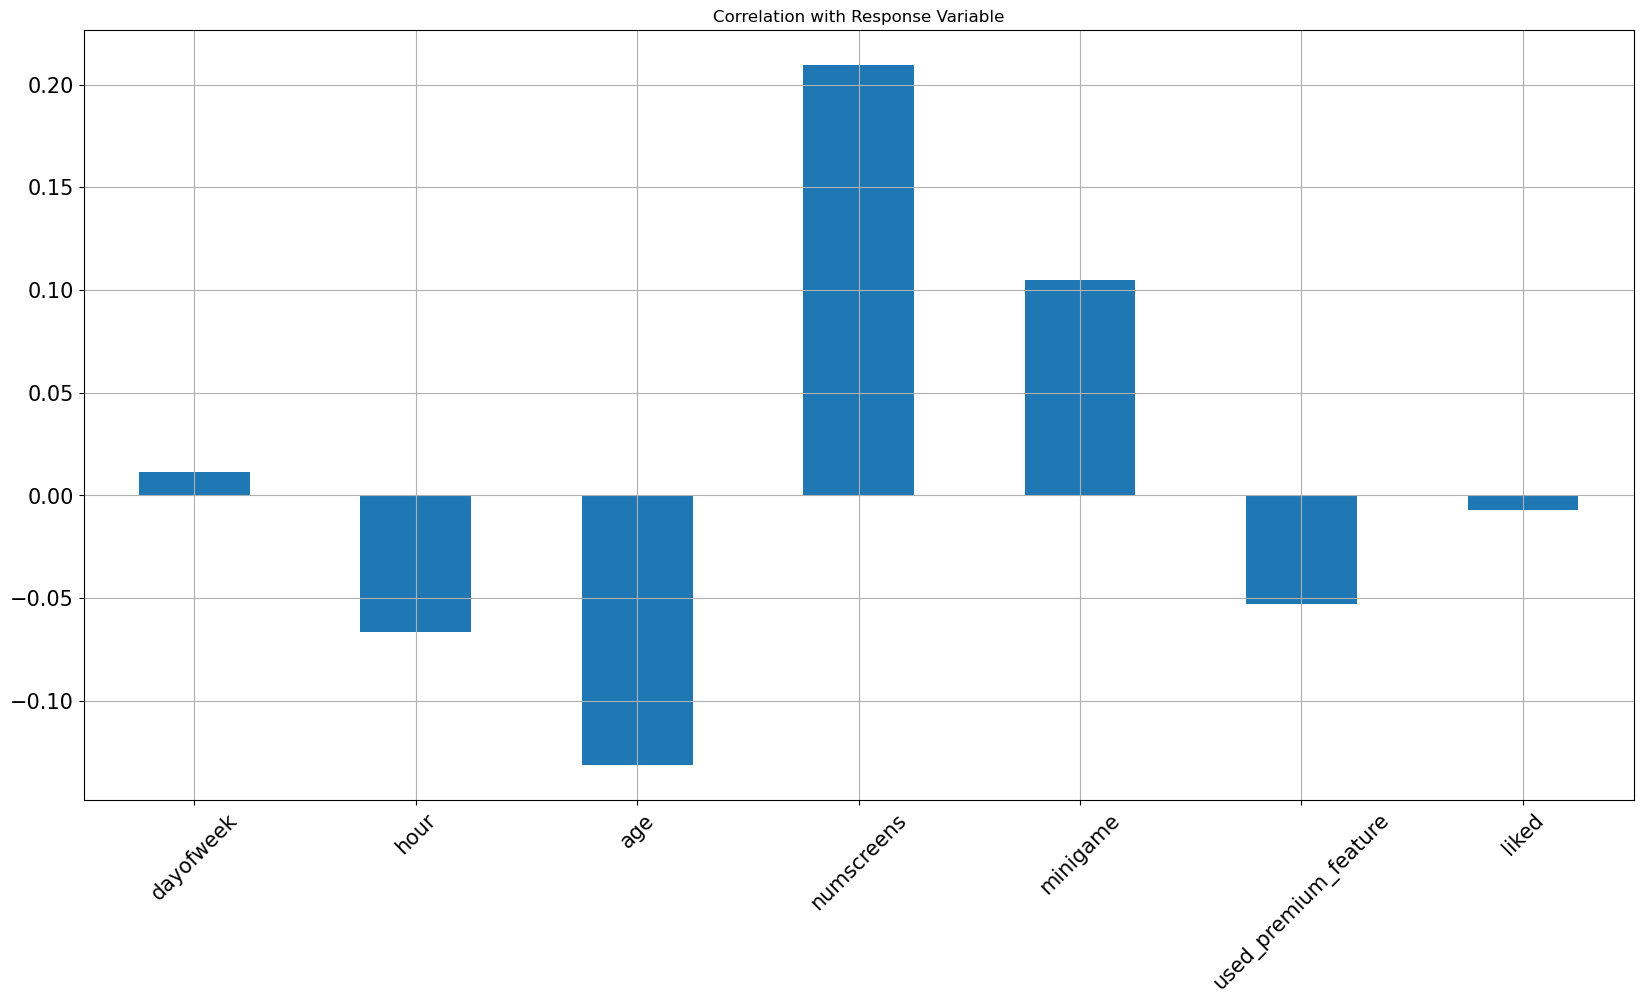

In [35]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (20, 10),
                                            title = 'Correlation with Response Variable',
                                            fontsize =  15, rot = 45,
                                            grid = True)

# 상관관계 분석
<br>
<ul>
    <li>dayofweek: 적은 상관관계</li>
    <li>hour: 사용시간이 적을 수록 등록 할 가능성 높음</li>
    <li>age: 나이가 적을 수록 등록 할 가능성 높음</li>
    <li>numscreens: 페이지를 많이 볼 수 록 등록 가능성 높음</li>
    <li>minigame: 미니 게임을 하면 등록 가능성 높음</li>
    <li>used_premium_feature: 프리미엄 기능을 사용할 수록 등록 가능성 낮음</li>
    <li>liked: 적은 상관 관계 </li>
</ul>

이는 완전한 결과가 아님, EDA 결과일 뿐이며 실제 학습시에는 달라질 수 있다.